<a href="https://colab.research.google.com/github/SantosCristiano/artificial-intelligence-python/blob/main/03_neural_network_regression_estimator_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow 1

## Aula 15 - Tensor Flow - Redes Neurais - Regressão com Estimator API

### Importando o tensorflow e o numpy

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [ ]:
noise = np.random.randn(len(x_data))

<strong>y = mx + b</strong>
<br />
<strong>m = 0.5</strong><br />
<strong>b = 5</strong>

In [ ]:
y_true = (0.5 * x_data) + 5 + noise

In [ ]:
x_df = pd.DataFrame(data = x_data, columns = ['X Data'])

In [ ]:
y_df = pd.DataFrame(data = y_true, columns = ['Y'])

In [ ]:
my_data = pd.concat([x_df, y_df], axis = 1)

## TF Estimator

### Configurando as features

 Teremos uma feature só, e é numérica

In [ ]:
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

### Configurando o estimador

obs. ignore os warnings

In [ ]:
estimator = tf.estimator.LinearRegressor(feature_columns = feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmph3gj5ntn', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## Divisão da base para treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size = 0.3, random_state = 101)

### Como separamos 30% da base para teste, de um milhão de pontos de dados, temos 700000 para treinar o modelo

In [ ]:
print(x_train.shape)

(700000,)


In [ ]:
print(x_eval.shape)

(300000,)


### Configurando a entrada do estimador

A gente precisa ter uma função de entrada, isso funciona como seu dicionário de feed e indicador de tamanho de lote, tudo de uma vez.

In [ ]:
input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train }, y_train, batch_size = 8, num_epochs = None, shuffle = True)

## Função de entrada dos dados de treinamento

In [ ]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train }, y_train, batch_size = 8, num_epochs = 1000, shuffle = False)

A razão do shuffle false, é que vamos usar essa função de entrada para avaliar em relação a uma função de entrada de teste.

## Função de entrada dos dados de teste

In [ ]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_eval }, y_eval, batch_size = 8, num_epochs = 1000, shuffle = False)

## Treinando o estimador.

In [ ]:
estimator.train(input_fn = input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmph3gj5ntn/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 408.99768, step = 1
INFO:tensorflow:global_step/sec: 741.896
INFO:tensorflow:loss = 39.96029, step = 101 (0.141 sec)
INFO:tensorflow:global_step/sec: 881.82
INFO:tensorflow:loss = 28.276405, step = 201 (0.111 sec)
INFO:tensorflow:global_step/sec: 960.362
INFO:tensorflow:loss = 14.447216, step = 301 (0.103 sec)
INFO:tensorflow:global_step/sec: 932.26
INFO:tensorflow:loss = 16.589119, step = 401 (0.107 sec)
INFO:tensorflow:global_step/sec: 893.643
INFO:tensorflow:loss = 19.283585, step = 501 (0.118 sec)
INFO:tensorflow:global_step/sec: 847.569
INFO:tensorflow:loss = 3.3359241, step = 601 (0.113 sec)
INFO:tensorflow:global_step/

Observe acima, que começamos com uma grande perda e muito rapidamente começou a diminuir.

Pode subir e descer conforme você continua treinando, pode ver que no meio oscila um pouco

Agora é hora de obter algumas métricas de avaliação e a API do estimador também tem bons métodos para isso

In [ ]:
train_metrics = estimator.evaluate(input_fn = train_input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-05-18T14:53:13Z


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmph3gj5ntn/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Inference Time : 1.13710s
INFO:tensorflow:Finished evaluation at 2021-05-18-14:53:14
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0636837, global_step = 1000, label/mean = 7.503073, loss = 8.50947, prediction/mean = 7.335715
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmph3gj5ntn/model.ckpt-1000


A razão pela qual eu quero esta função de entrada de treino<strong>(train_input_func)</strong> em vez da função de entrada(<strong>input_fn</strong>), é porque como estamos usando ela para avaliar, e é preciso que esteja na ordem, ou seja, <strong>shuffle = False</strong> para que a avaliação seja feita corretamente

## Avaliação da métrica

In [ ]:
eval_metrics = estimator.evaluate(input_fn = eval_input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-05-18T14:53:15Z


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmph3gj5ntn/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Inference Time : 1.16516s
INFO:tensorflow:Finished evaluation at 2021-05-18-14:53:16
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0799035, global_step = 1000, label/mean = 7.4691253, loss = 8.639228, prediction/mean = 7.3147674
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmph3gj5ntn/model.ckpt-1000


In [ ]:
print('MÉTRICAS DE DADOS DE TREINAMENTO')
print(train_metrics)

MÉTRICAS DE DADOS DE TREINAMENTO
{'average_loss': 1.0636837, 'label/mean': 7.503073, 'loss': 8.50947, 'prediction/mean': 7.335715, 'global_step': 1000}


In [ ]:
print('AVALIAÇÃO DAS MÉTRICAS')
print(eval_metrics)

AVALIAÇÃO DAS MÉTRICAS
{'average_loss': 1.0799035, 'label/mean': 7.4691253, 'loss': 8.639228, 'prediction/mean': 7.3147674, 'global_step': 1000}


Um bom indicador pra saber se houve um ajuste excessivo, isto é, um overfitting do modelo, é quando você tem uma perda bem baixa nos dados de treinamento, mas, uma perda alta nos dados de avaliação, ou seja, os dados separados para o teste.

O desejado é que a perda média seja bem próxima nos dois: MÉTRICAS DE DADOS DE TREINAMENTO e AVALIAÇÃO DAS MÉTRICAS

# Prevendo valores

Gerando dados novos para testar o modelo

In [ ]:
brand_new_data = np.linspace(0, 10, 10)

In [ ]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x': brand_new_data}, shuffle = False)

In [ ]:
list(estimator.predict(input_fn = input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmph3gj5ntn/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


[{'predictions': array([4.4354224], dtype=float32)},
 {'predictions': array([5.0796423], dtype=float32)},
 {'predictions': array([5.7238617], dtype=float32)},
 {'predictions': array([6.3680816], dtype=float32)},
 {'predictions': array([7.0123014], dtype=float32)},
 {'predictions': array([7.656521], dtype=float32)},
 {'predictions': array([8.300741], dtype=float32)},
 {'predictions': array([8.944961], dtype=float32)},
 {'predictions': array([9.58918], dtype=float32)},
 {'predictions': array([10.2334], dtype=float32)}]

In [ ]:
predictions = []

In [ ]:
for pred in estimator.predict(input_fn = input_fn_predict):
  predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmph3gj5ntn/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [ ]:
print(predictions)

[array([4.4354224], dtype=float32), array([5.0796423], dtype=float32), array([5.7238617], dtype=float32), array([6.3680816], dtype=float32), array([7.0123014], dtype=float32), array([7.656521], dtype=float32), array([8.300741], dtype=float32), array([8.944961], dtype=float32), array([9.58918], dtype=float32), array([10.2334], dtype=float32)]


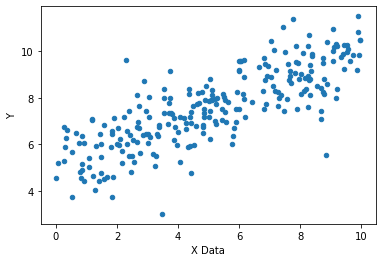

In [ ]:
my_data.sample(n = 250).plot(kind = 'scatter', x = 'X Data', y = 'Y')

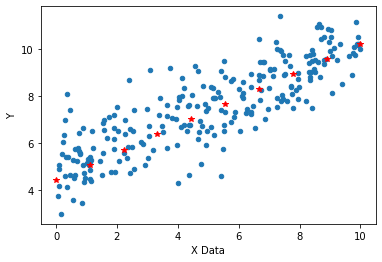

In [ ]:
my_data.sample(n = 250).plot(kind = 'scatter', x = 'X Data', y = 'Y')
plt.plot(brand_new_data, predictions, 'r*')